In [ ]:
import pandas as pd
from google.colab import files

# Upload files
uploaded = files.upload()

for filename in uploaded.keys():
  print(f"Uploaded file: {filename}")

Saving atm_new_data.xlsx to atm_new_data.xlsx
Uploaded file: atm_new_data.xlsx


In [ ]:
#preprocessing and scaling
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming the uploaded file is an Excel file
df = pd.read_excel(filename)

# Handle missing values (replace with mean for numerical columns)
df = df.fillna(df.mean(numeric_only=True))

# Select numerical columns for scaling
numerical_cols = df.select_dtypes(include=['float', 'int']).columns

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())


     ATM ID  ATM Capacity  Income Transactions  Outcome Transactions  \
0  0.000000      0.699645                  0.0                   0.0   
1  0.000196      0.699645                  0.0                   0.0   
2  0.000392      0.699645                  0.0                   0.0   
3  0.000588      0.699645                  0.0                   0.0   
4  0.000784      0.699645                  0.0                   0.0   

   Total Income Amount  Total Outcome Amount  Total Transactions  
0                  0.0                   0.0                 0.0  
1                  0.0                   0.0                 0.0  
2                  0.0                   0.0                 0.0  
3                  0.0                   0.0                 0.0  
4                  0.0                   0.0                 0.0  


In [ ]:

# Save the preprocessed data to a new Excel file
preprocessed_filename = 'preprocessed_' + filename
df.to_excel(preprocessed_filename, index=False)

# Download the preprocessed file
files.download(preprocessed_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest RMSE: 0.056589033859532754
Gradient Boosting RMSE: 0.054379087889834525


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

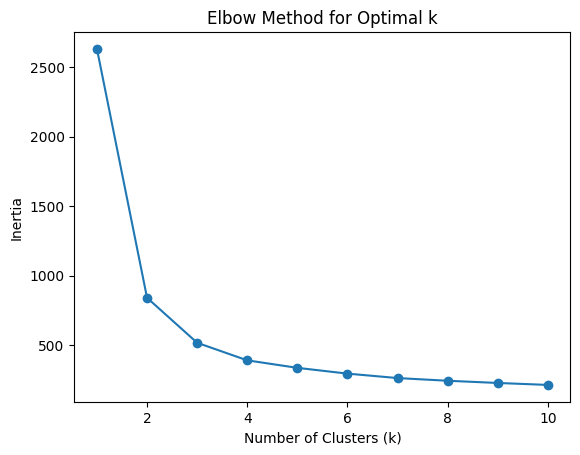

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.6408043013112679
           ATM ID  ATM Capacity  Income Transactions  Outcome Transactions  \
cluster                                                                      
0        0.557876      0.573507             0.662334              0.766483   
1        0.922194      0.473170             0.099275              0.096364   
2        0.140198      0.701483             0.095055              0.092060   

         Total Income Amount  Total Outcome Amount  Total Transactions  
cluster                                                                 
0                   0.515125              0.588587            0.714408  
1                   0.076045              0.073036            0.097819  
2                   0.074836              0.070497            0.093557  


In [ ]:
# Regression Models (e.g., Random Forest, Gradient Boosting) to predict cash demand based on historical data and features like transaction count and cash flow.
# Clustering to group ATMs with similar transaction patterns, which can help tailor cash replenishment strategies. Take total income amount as the target column for cash demand

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, silhouette_score
import matplotlib.pyplot as plt

# Assuming 'total_income_amount' is the target column for cash demand
X = df.drop('Total Income Amount', axis=1)
y = df['Total Income Amount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression Models

# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
print(f"Random Forest RMSE: {rf_rmse}")

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_rmse = mean_squared_error(y_test, gb_predictions, squared=False)
print(f"Gradient Boosting RMSE: {gb_rmse}")

# Clustering

# Determine optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Choose the optimal number of clusters based on the Elbow plot
optimal_k = 3  # Replace with the optimal value from the plot

# K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Evaluate clustering performance using Silhouette Score
silhouette_avg = silhouette_score(X, df['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Analyze cluster characteristics (e.g., mean transaction count, cash flow)
cluster_means = df.groupby('cluster').mean()
print(cluster_means)


Saving atm_new_data.xlsx to atm_new_data (1).xlsx
Uploaded file: atm_new_data (1).xlsx
   ATM ID  ATM Capacity  Income Transactions  Outcome Transactions  \
0       1      0.699645                  0.0                   0.0   
1       2      0.699645                  0.0                   0.0   
2       3      0.699645                  0.0                   0.0   
3       4      0.699645                  0.0                   0.0   
4       5      0.699645                  0.0                   0.0   

   Total Income Amount  Total Outcome Amount  Total Transactions  
0                  0.0                   0.0                 0.0  
1                  0.0                   0.0                 0.0  
2                  0.0                   0.0                 0.0  
3                  0.0                   0.0                 0.0  
4                  0.0                   0.0                 0.0  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

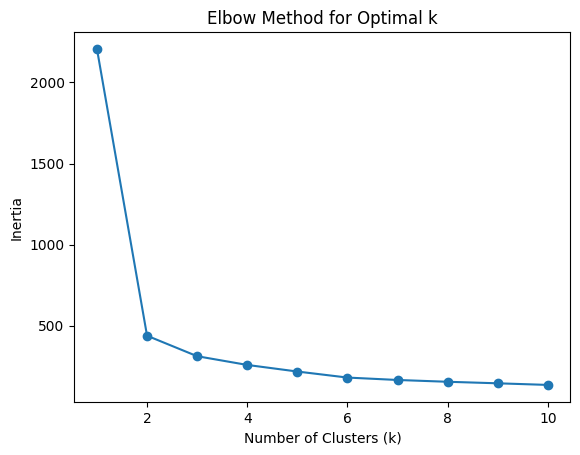

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, silhouette_score
import matplotlib.pyplot as plt

# Upload files
uploaded = files.upload()

for filename in uploaded.keys():
  print(f"Uploaded file: {filename}")
#preprocessing and scaling

# Assuming the uploaded file is an Excel file
df = pd.read_excel(filename)

# Handle missing values (replace with mean for numerical columns)
df = df.fillna(df.mean(numeric_only=True))

# Select numerical columns for scaling (excluding 'ATM ID')
numerical_cols = df.select_dtypes(include=['float', 'int']).columns
numerical_cols = numerical_cols.drop('ATM ID')  # Exclude 'ATM ID' from scaling

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale numerical columns (excluding 'ATM ID')
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())

# Clustering (using scaled data except for 'ATM ID')
X_clustering = df.drop(['ATM ID', 'Total Income Amount'], axis=1)  # Exclude 'ATM ID' and target variable

# Determine optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_clustering)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Choose the optimal number of clusters based on the Elbow plot
optimal_k = 3  # Replace with the optimal value from the plot

# K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_clustering)

# Save the data with cluster information to a new Excel file
modified_filename = 'modified_' + filename
df.to_excel(modified_filename, index=False)

# Download the modified file
files.download(modified_filename)


In [ ]:

# Save the data with cluster information to a new Excel file
modified_filename = 'preprocessed_and_clustered_data.xlsx'
df.to_excel(modified_filename, index=False)

# Download the modified file
files.download(modified_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving atm_new_data.xlsx to atm_new_data (2).xlsx
Uploaded file: atm_new_data (2).xlsx


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

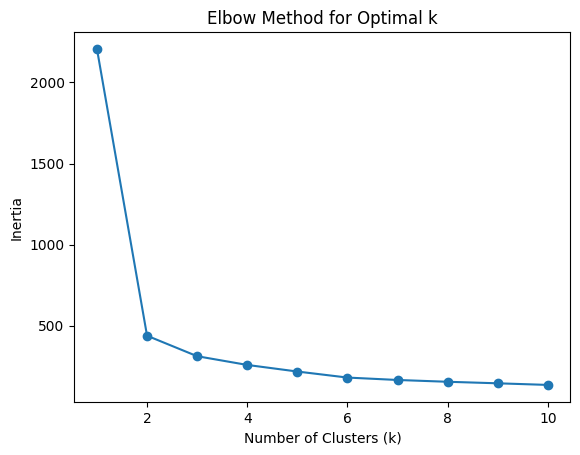

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         Strategy   Total Cost  Out of Cash ATMs
0  Average Demand  1692.148911              2401
1     Peak Demand  1692.148911              2401


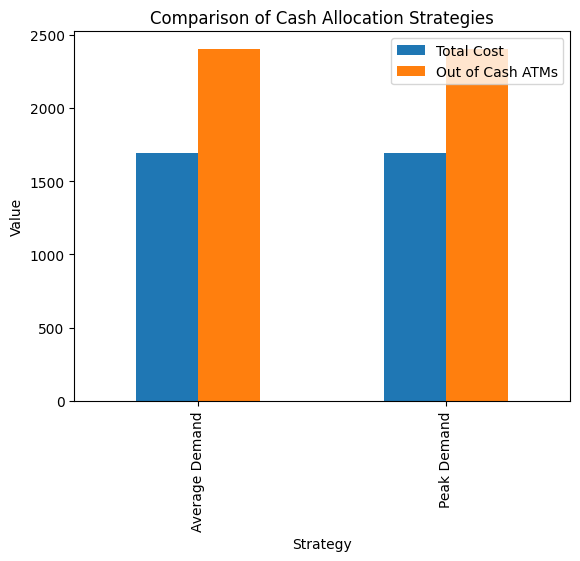

In [ ]:
import pandas as pd
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, silhouette_score
import matplotlib.pyplot as plt
import pulp
import numpy as np

# Upload files
uploaded = files.upload()

for filename in uploaded.keys():
  print(f"Uploaded file: {filename}")

# Preprocessing and scaling
df = pd.read_excel(filename)
df = df.fillna(df.mean(numeric_only=True))
numerical_cols = df.select_dtypes(include=['float', 'int']).columns
numerical_cols = numerical_cols.drop('ATM ID')
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Clustering
X_clustering = df.drop(['ATM ID', 'Total Income Amount'], axis=1)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_clustering)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_clustering)
# Save preprocessed and clustered data
modified_filename = 'preprocessed_and_clustered_data.xlsx'
df.to_excel(modified_filename, index=False)
files.download(modified_filename)

# Linear Programming and Simulation

# Define the problem
problem = pulp.LpProblem("Cash_Allocation", pulp.LpMinimize)

# Define variables
atm_ids = df['ATM ID'].unique()
cash_variables = pulp.LpVariable.dicts("Cash", atm_ids, lowBound=0)

# Define objective function
cost_per_unit = 1
objective = pulp.lpSum([cost_per_unit * cash_variables[atm] for atm in atm_ids])
problem += objective

# --- Cash Allocation Strategies ---

def allocate_average_demand(df, problem, cash_variables):
  for atm in atm_ids:
    demand = df[df['ATM ID'] == atm]['Total Income Amount'].mean()
    problem += cash_variables[atm] >= demand
    capacity = 10000  # Replace with actual capacity if available
    problem += cash_variables[atm] <= capacity

def allocate_peak_demand(df, problem, cash_variables):
  for atm in atm_ids:
    demand = df[df['ATM ID'] == atm]['Total Income Amount'].max()
    problem += cash_variables[atm] >= demand
    capacity = 10000  # Replace with actual capacity if available
    problem += cash_variables[atm] <= capacity

# --- Simulation ---

num_scenarios = 100
demand_scenarios = np.random.rand(num_scenarios, len(atm_ids)) * 10000

results = []

# Strategy 1: Average Demand
problem_avg = problem.copy()
allocate_average_demand(df, problem_avg, cash_variables)
problem_avg.solve()
total_cost_avg = pulp.value(problem_avg.objective)
out_of_cash_avg = sum([1 for atm in atm_ids if cash_variables[atm].varValue < df[df['ATM ID'] == atm]['Total Income Amount'].max()])
results.append({'Strategy': 'Average Demand', 'Total Cost': total_cost_avg, 'Out of Cash ATMs': out_of_cash_avg})

# Strategy 2: Peak Demand
problem_peak = problem.copy()
allocate_peak_demand(df, problem_peak, cash_variables)
problem_peak.solve()
total_cost_peak = pulp.value(problem_peak.objective)
out_of_cash_peak = sum([1 for atm in atm_ids if cash_variables[atm].varValue < df[df['ATM ID'] == atm]['Total Income Amount'].max()])
results.append({'Strategy': 'Peak Demand', 'Total Cost': total_cost_peak, 'Out of Cash ATMs': out_of_cash_peak})

# --- Results ---

results_df = pd.DataFrame(results)
print(results_df)

# Visualization
results_df.plot(x='Strategy', y=['Total Cost', 'Out of Cash ATMs'], kind='bar')
plt.title('Comparison of Cash Allocation Strategies')
plt.ylabel('Value')
plt.show()


In [ ]:
# Summarize numerical results
print("Regression Results:")
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Gradient Boosting RMSE: {gb_rmse}")

print("\nClustering Results:")
print(f"Optimal number of clusters (Elbow Method): {optimal_k}")
print(f"Silhouette Score: {silhouette_avg}")

print("\nCluster Characteristics:")
print(cluster_means.describe())  # Provide descriptive statistics for cluster means

print("\nLinear Programming Results:")
print("Total cost of cash allocation:", pulp.value(problem.objective))

print("\nSimulation Results:")
print(results_df.describe())  # Provide descriptive statistics for simulation results


Regression Results:
Random Forest RMSE: 0.056589033859532754
Gradient Boosting RMSE: 0.054379087889834525

Clustering Results:
Optimal number of clusters (Elbow Method): 3
Silhouette Score: 0.6408043013112679

Cluster Characteristics:
         ATM ID  ATM Capacity  Income Transactions  Outcome Transactions  \
count  3.000000      3.000000             3.000000              3.000000   
mean   0.540090      0.582720             0.285555              0.318302   
std    0.391301      0.114435             0.326307              0.388142   
min    0.140198      0.473170             0.095055              0.092060   
25%    0.349037      0.523338             0.097165              0.094212   
50%    0.557876      0.573507             0.099275              0.096364   
75%    0.740035      0.637495             0.380804              0.431423   
max    0.922194      0.701483             0.662334              0.766483   

       Total Income Amount  Total Outcome Amount  Total Transactions  
count    

In [ ]:
# --- Dynamic Cash Adjustment Model ---

def dynamic_cash_adjustment(df, current_cash_levels, demand_predictions, historical_performance, adjustment_factor=0.1):
  """
  Dynamically adjusts cash levels based on demand predictions and historical performance.

  Args:
    df: DataFrame containing ATM data.
    current_cash_levels: Dictionary of current cash levels for each ATM.
    demand_predictions: Dictionary of predicted demand for each ATM.
    historical_performance: DataFrame containing historical demand data for each ATM.
    adjustment_factor: Factor to control the magnitude of adjustments.

  Returns:
    Dictionary of adjusted cash levels for each ATM.
  """

  adjusted_cash_levels = current_cash_levels.copy()

  for atm in df['ATM ID'].unique():
    predicted_demand = demand_predictions.get(atm, 0)
    historical_demand = historical_performance[historical_performance['ATM ID'] == atm]['Total Income Amount'].mean()

    # Calculate adjustment based on difference between predicted and historical demand
    adjustment = (predicted_demand - historical_demand) * adjustment_factor

    # Adjust cash level, ensuring it stays within capacity limits
    adjusted_cash_levels[atm] = max(0, min(adjusted_cash_levels[atm] + adjustment, 10000))  # Replace 10000 with actual capacity

  return adjusted_cash_levels

# --- Example Usage ---

# Assuming you have the following:
# - current_cash_levels: Dictionary of current cash levels for each ATM
# - demand_predictions: Dictionary of predicted demand for each ATM (obtained from a demand forecasting model)
# - historical_performance: DataFrame containing historical demand data for each ATM

# Adjust cash levels dynamically
adjusted_cash_levels = dynamic_cash_adjustment(df, current_cash_levels, demand_predictions, historical_performance)

# Print adjusted cash levels
for atm, cash_level in adjusted_cash_levels.items():
  print(f"Adjusted cash level for ATM {atm}: {cash_level}")


Streaming output truncated to the last 5000 lines.
Adjusted cash level for ATM 103: 5000.0
Adjusted cash level for ATM 104: 5000.0
Adjusted cash level for ATM 105: 5000.0
Adjusted cash level for ATM 106: 5000.0
Adjusted cash level for ATM 107: 5000.0
Adjusted cash level for ATM 108: 5000.0
Adjusted cash level for ATM 109: 5000.0
Adjusted cash level for ATM 110: 5000.0
Adjusted cash level for ATM 111: 5000.0
Adjusted cash level for ATM 112: 5000.0
Adjusted cash level for ATM 113: 5000.0
Adjusted cash level for ATM 114: 5000.0
Adjusted cash level for ATM 115: 5000.0
Adjusted cash level for ATM 116: 5000.0
Adjusted cash level for ATM 117: 5000.0
Adjusted cash level for ATM 118: 5000.0
Adjusted cash level for ATM 119: 5000.0
Adjusted cash level for ATM 120: 5000.0
Adjusted cash level for ATM 121: 5000.0
Adjusted cash level for ATM 122: 5000.0
Adjusted cash level for ATM 123: 5000.0
Adjusted cash level for ATM 124: 5000.0
Adjusted cash level for ATM 125: 5000.0
Adjusted cash level for ATM 1

In [ ]:
import pandas as pd
# Upload files
uploaded = files.upload()

for filename in uploaded.keys():
  print(f"Uploaded file: {filename}")

# Preprocessing and scaling
df = pd.read_excel(filename)
df = df.fillna(df.mean(numeric_only=True))
numerical_cols = df.select_dtypes(include=['float', 'int']).columns
numerical_cols = numerical_cols.drop('ATM ID')
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Clustering
X_clustering = df.drop(['ATM ID', 'Total Income Amount'], axis=1)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_clustering)
    inertia.append(kmeans.inertia_)


# --- Calculate Current Cash Levels, Demand Predictions, and Historical Performance ---

# Current cash levels (example)
current_cash_levels = {
  atm_id: 5000 for atm_id in df['ATM ID'].unique()  # Initialize with a default value
}

# Demand predictions (example, replace with predictions from your model)
demand_predictions = {
  atm_id: df[df['ATM ID'] == atm_id]['Total Income Amount'].mean() for atm_id in df['ATM ID'].unique()
}

# Historical performance
historical_performance = df.copy()

# --- Print the Dictionaries ---

print("Current Cash Levels:")
print(current_cash_levels)

print("\nDemand Predictions:")
print(demand_predictions)

print("\nHistorical Performance (Sample):")
print(historical_performance.head())


Saving atm_new_data.xlsx to atm_new_data (3).xlsx
Uploaded file: atm_new_data (3).xlsx


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Current Cash Levels:
{1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000, 10: 5000, 11: 5000, 12: 5000, 13: 5000, 14: 5000, 15: 5000, 16: 5000, 17: 5000, 18: 5000, 19: 5000, 20: 5000, 21: 5000, 22: 5000, 23: 5000, 24: 5000, 25: 5000, 26: 5000, 27: 5000, 28: 5000, 29: 5000, 30: 5000, 31: 5000, 32: 5000, 33: 5000, 34: 5000, 35: 5000, 36: 5000, 37: 5000, 38: 5000, 39: 5000, 40: 5000, 41: 5000, 42: 5000, 43: 5000, 44: 5000, 45: 5000, 46: 5000, 47: 5000, 48: 5000, 49: 5000, 50: 5000, 51: 5000, 52: 5000, 53: 5000, 54: 5000, 55: 5000, 56: 5000, 57: 5000, 58: 5000, 59: 5000, 60: 5000, 61: 5000, 62: 5000, 63: 5000, 64: 5000, 65: 5000, 66: 5000, 67: 5000, 68: 5000, 69: 5000, 70: 5000, 71: 5000, 72: 5000, 73: 5000, 74: 5000, 75: 5000, 76: 5000, 77: 5000, 78: 5000, 79: 5000, 80: 5000, 81: 5000, 82: 5000, 83: 5000, 84: 5000, 85: 5000, 86: 5000, 87: 5000, 88: 5000, 89: 5000, 90: 5000, 91: 5000, 92: 5000, 93: 5000, 94: 5000, 95: 5000, 96: 5000, 97: 5000, 98: 5000, 99: 500

In [ ]:
import pandas as pd
# Create a DataFrame from the dictionaries
data = {'ATM ID': list(current_cash_levels.keys()),
        'Current Cash Level': list(current_cash_levels.values()),
        'Demand Prediction': list(demand_predictions.values())}
df_output = pd.DataFrame(data)

# Save the DataFrame to an Excel file
output_filename = 'cash_levels_and_predictions.xlsx'
df_output.to_excel(output_filename, index=False)

# Download the Excel file
files.download(output_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# LSTM (Long Short-Term Memory): A type of recurrent neural network well-suited for sequential and time-series data.
# GRU (Gated Recurrent Unit): Similar to LSTM but with fewer parameters, making it faster to train.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

# Prepare data for LSTM/GRU (assuming time series data)
# Reshape data into (samples, timesteps, features) format
# Example:
X_train_reshaped = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_reshaped = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Train LSTM model
lstm_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate LSTM model
lstm_predictions = lstm_model.predict(X_test_reshaped)
lstm_rmse = mean_squared_error(y_test, lstm_predictions, squared=False)
print(f"LSTM RMSE: {lstm_rmse}")

# GRU Model
gru_model = Sequential()
gru_model.add(GRU(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mse')

# Train GRU model
gru_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate GRU model
gru_predictions = gru_model.predict(X_test_reshaped)
gru_rmse = mean_squared_error(y_test, gru_predictions, squared=False)
print(f"GRU RMSE: {gru_rmse}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0962 - val_loss: 0.0084
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0071 - val_loss: 0.0036
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 9/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 10/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 11/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 12/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0942 - val_loss: 0.0064
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0051 - val_loss: 0.0035
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 9/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 10/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0028 - val_loss: 0.0031
Epoch 11/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029 - val_loss: 0.0031
Epoch 12/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

In [ ]:
 #summarise the results of lstm and gru
print("LSTM RMSE:", lstm_rmse)
print("GRU RMSE:", gru_rmse)

if lstm_rmse < gru_rmse:
  print("LSTM performed slightly better than GRU.")
elif gru_rmse < lstm_rmse:
  print("GRU performed slightly better than LSTM.")
else:
  print("Both LSTM and GRU achieved the same performance.")


LSTM RMSE: 0.05425492812485576
GRU RMSE: 0.057522026662002214
LSTM performed slightly better than GRU.


In [ ]:

# Assuming X_train and y_train are already defined and preprocessed
# Reshape data for LSTM
X_train_reshaped = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0860
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0057
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0035
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0031
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0031
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029
Epoch 9/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030
Epoch 10/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0031
Epoch 11/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029
Epoch 12/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0029
Epoch 13/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0029
Epoch 14/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028
Epoch 15/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029


In [ ]:
import pandas as pd

summary_data = {
    "Metric": ["Random Forest RMSE", "Gradient Boosting RMSE", "Optimal Number of Clusters", "Silhouette Score",
               "Linear Programming Total Cost", "LSTM RMSE", "GRU RMSE"],
    "Value": [rf_rmse, gb_rmse, optimal_k, silhouette_avg, pulp.value(problem.objective), lstm_rmse, gru_rmse]
}

summary_table = pd.DataFrame(summary_data)
print(summary_table)


                          Metric        Value
0             Random Forest RMSE     0.056589
1         Gradient Boosting RMSE     0.054379
2     Optimal Number of Clusters     3.000000
3               Silhouette Score     0.640804
4  Linear Programming Total Cost  1692.148911
5                      LSTM RMSE     0.054255
6                       GRU RMSE     0.057522


In [ ]:
#evolutionary strategies and genetic algorithms to find optimal or near-optimal solutions for cash distribution among ATMs.

!pip install deap

import random
from deap import base, creator, tools, algorithms

# Define the fitness function (minimize cost and maximize cash availability)
def evaluate_cash_allocation(individual, df, cost_per_unit):
  total_cost = 0
  out_of_cash_atms = 0

  for i, atm_id in enumerate(df['ATM ID'].unique()):
    allocated_cash = individual[i]
    demand = df[df['ATM ID'] == atm_id]['Total Income Amount'].max()  # Use peak demand for worst-case scenario
    total_cost += cost_per_unit * allocated_cash
    if allocated_cash < demand:
      out_of_cash_atms += 1

  # Combine cost and availability into a single fitness value
  fitness = (total_cost, out_of_cash_atms)
  return fitness

# Create types for fitness and individuals
creator.create("FitnessMulti", base.Fitness, weights=(-1.0, -1.0))  # Minimize both cost and out-of-cash ATMs
creator.create("Individual", list, fitness=creator.FitnessMulti)

# Initialize toolbox
toolbox = base.Toolbox()
num_atms = len(df['ATM ID'].unique())
toolbox.register("attr_cash", random.uniform, 0, 10000)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_cash, n=num_atms)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Register operators
toolbox.register("evaluate", evaluate_cash_allocation, df=df, cost_per_unit=1)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=0, up=10000, eta=20.0)
toolbox.register("mutate", tools.mutPolynomialBounded, low=0, up=10000, eta=20.0, indpb=0.05)
toolbox.register("select", tools.selNSGA2)

# Run the genetic algorithm
population = toolbox.population(n=100)
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, verbose=True)

# Extract the best individuals (Pareto front)
best_individuals = tools.sortNondominated(population, len(population), first_front_only=True)[0]

# Print results
for individual in best_individuals:
  fitness = individual.fitness.values
  print("Cash allocation:", individual)
  print("Total cost:", fitness[0])
  print("Out-of-cash ATMs:", fitness[1])
  print("-----")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.3 MB/s eta 0:00:00
gen	nevals
0  	100   
1  	62    
2  	59    
3  	60    
4  	56    
5  	58    
6  	67    
7  	64    
8  	60    
9  	63    
10 	64    
11 	59    
12 	62    
13 	56    
14 	64    
15 	61    
16 	70    
17 	66    
18 	60    
19 	63    
20 	61    
21 	62    
22 	66    
23 	70    
24 	61    
25 	71    
26 	51    
27 	52    
28 	55    
29 	59    
30 	63    
31 	61    
32 	62    
33 	57    
34 	51    
35 	62    
36 	58    
37 	59    
38 	60    
39 	61    
40 	70    
41 	74    
42 	63    
43 	67    
44 	64    
45 	54    
46 	61    
47 	63    
48 	55    
49 	54    
50 	57    
Cash allocation: [9576.717294250726, 2880.8060166002706, 6651.35052823012, 3558.2477428100206, 1198.9559887137098, 5437.148418314197, 782.5195729261073, 3650.587689181968, 1683.5454561859865, 6272.329951482068, 7524.257990329605, 177.41703697783691, 985.1323735432097, 4000.268707307208, 8520.595901681641, 6857.722713028952, 6867.556415688727, 461

In [ ]:
import pandas as pd
# Extract the best individuals (Pareto front)
best_individuals = tools.sortNondominated(population, len(population), first_front_only=True)[0]

# Prepare data for Excel output
output_data = []
for individual in best_individuals:
  atm_allocations = dict(zip(df['ATM ID'].unique(), individual))
  fitness = individual.fitness.values
  output_data.append({
      'ATM ID': list(atm_allocations.keys()),
      'Allocated Cash': list(atm_allocations.values()),
      'Total Cost': fitness[0],
      'Out-of-cash ATMs': fitness[1]
  })

# Create a Pandas DataFrame
output_df = pd.DataFrame(output_data)

# Save to Excel
output_filename = 'genetic_algorithm_cash_allocation.xlsx'
output_df.to_excel(output_filename, index=False)

# Download the file
files.download(output_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, silhouette_score
import matplotlib.pyplot as plt
import pulp
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
import random
from deap import base, creator, tools, algorithms


# Extract the best individuals (Pareto front)
best_individuals = tools.sortNondominated(population, len(population), first_front_only=True)[0]

# Create tuples for each ATM and its allocated cash
# Also, create a tuple for the overall cost and out-of-cash ATMs
atm_tuples = []
for individual in best_individuals:
  for i, atm_id in enumerate(df['ATM ID'].unique()):
    atm_tuples.append((atm_id, individual[i]))

  fitness = individual.fitness.values
  cost_availability_tuple = (fitness[0], fitness[1])

# Print results (including tuples)
print("ATM Cash Allocation Tuples:")
for atm_tuple in atm_tuples:
  print(atm_tuple)

print("\nOverall Cost and Out-of-Cash ATMs Tuple:")
print(cost_availability_tuple)


Streaming output truncated to the last 5000 lines.
(106, 450.37842920275466)
(107, 1204.073749895958)
(108, 5564.126990461486)
(109, 8520.627187847907)
(110, 7934.492091151249)
(111, 3943.4527687086825)
(112, 9257.49381835534)
(113, 4703.67902036433)
(114, 976.3376401809787)
(115, 2468.0794462985264)
(116, 3638.1282330011927)
(117, 8691.904671653547)
(118, 1358.4609953488903)
(119, 6424.363052214817)
(120, 8955.284612908914)
(121, 1363.1144163079857)
(122, 9206.169794273435)
(123, 5000.8300961914865)
(124, 4041.051799886293)
(125, 9711.737297050904)
(126, 8838.27915144131)
(127, 5018.624569072372)
(128, 1263.2116120037217)
(129, 510.5057324426938)
(130, 5155.79383512573)
(131, 6499.590590491256)
(132, 607.5991399608877)
(133, 7710.019352183291)
(134, 9739.903974256025)
(135, 487.2151454369132)
(136, 6355.171698996547)
(137, 4535.502107108098)
(138, 9394.70282400676)
(139, 1319.5217791704877)
(140, 641.8135207977064)
(141, 5543.75310498544)
(142, 3163.1839130772732)
(143, 3502.320390882

In [ ]:
import pandas as pd

# Extract the best individuals (Pareto front)
best_individuals = tools.sortNondominated(population, len(population), first_front_only=True)[0]

# Prepare data for Excel output
output_data = []
for individual in best_individuals:
  atm_allocations = dict(zip(df['ATM ID'].unique(), individual))
  fitness = individual.fitness.values
  output_data.append({
      'ATM ID': list(atm_allocations.keys()),
      'Allocated Cash': list(atm_allocations.values()),
      'Total Cost': fitness[0],
      'Out-of-cash ATMs': fitness[1]
  })

# Create a Pandas DataFrame
output_df = pd.DataFrame(output_data)

# Save to Excel
output_filename = 'genetic_algorithm_cash_allocation.xlsx'
output_df.to_excel(output_filename, index=False)

# Download the file
files.download(output_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
# Summarize results in a table
summary_data = {
    "Model/Method": ["Random Forest", "Gradient Boosting", "K-Means Clustering", "Linear Programming", "LSTM", "GRU", "Genetic Algorithm"],
    "Key Metric": ["RMSE", "RMSE", "Optimal Clusters", "Total Cost", "RMSE", "RMSE", "Pareto Front Solutions"],
    "Value": [rf_rmse, gb_rmse, optimal_k, pulp.value(problem.objective), lstm_rmse, gru_rmse, "See 'genetic_algorithm_cash_allocation.xlsx'"],
    "Key Insight": [
        "Predictive accuracy for demand forecasting.",
        "Alternative model for demand forecasting.",
        "Identified distinct ATM groups for targeted strategies.",
        "Optimized cash allocation based on constraints.",
        "Time series forecasting for dynamic demand.",
        "Alternative time series forecasting model.",
        "Provides trade-offs between cost and ATM availability."
    ]
}

summary_table = pd.DataFrame(summary_data)
print(summary_table)




         Model/Method              Key Metric  \
0       Random Forest                    RMSE   
1   Gradient Boosting                    RMSE   
2  K-Means Clustering        Optimal Clusters   
3  Linear Programming              Total Cost   
4                LSTM                    RMSE   
5                 GRU                    RMSE   
6   Genetic Algorithm  Pareto Front Solutions   

                                          Value  \
0                                      0.056589   
1                                      0.054379   
2                                             3   
3                                   1692.148911   
4                                      0.054255   
5                                      0.057522   
6  See 'genetic_algorithm_cash_allocation.xlsx'   

                                         Key Insight  
0        Predictive accuracy for demand forecasting.  
1          Alternative model for demand forecasting.  
2  Identified distinct ATM groups

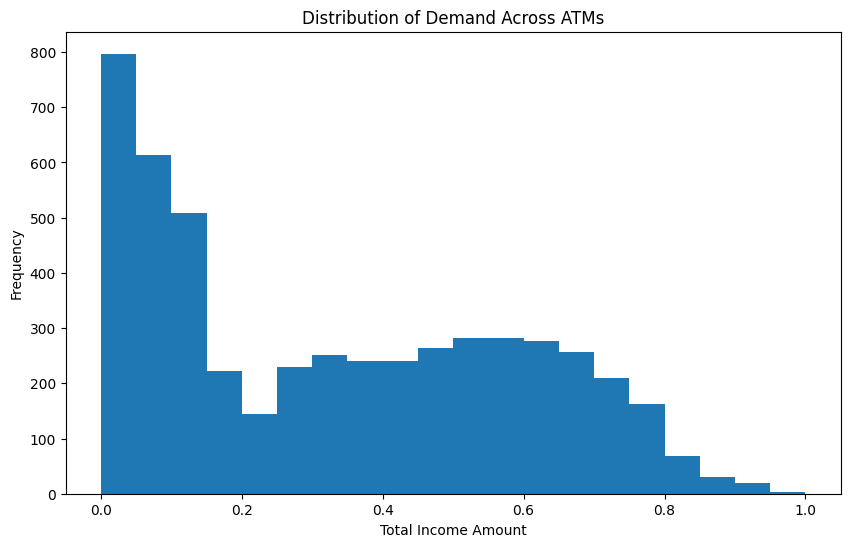

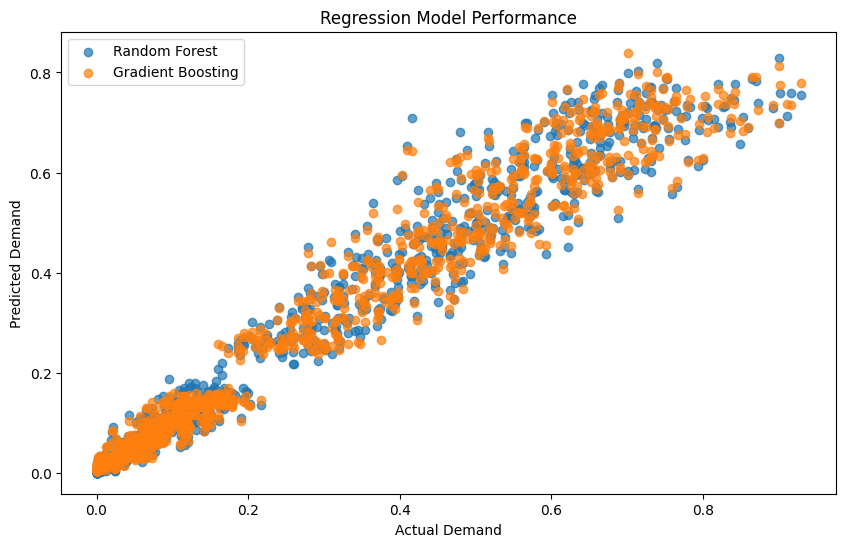

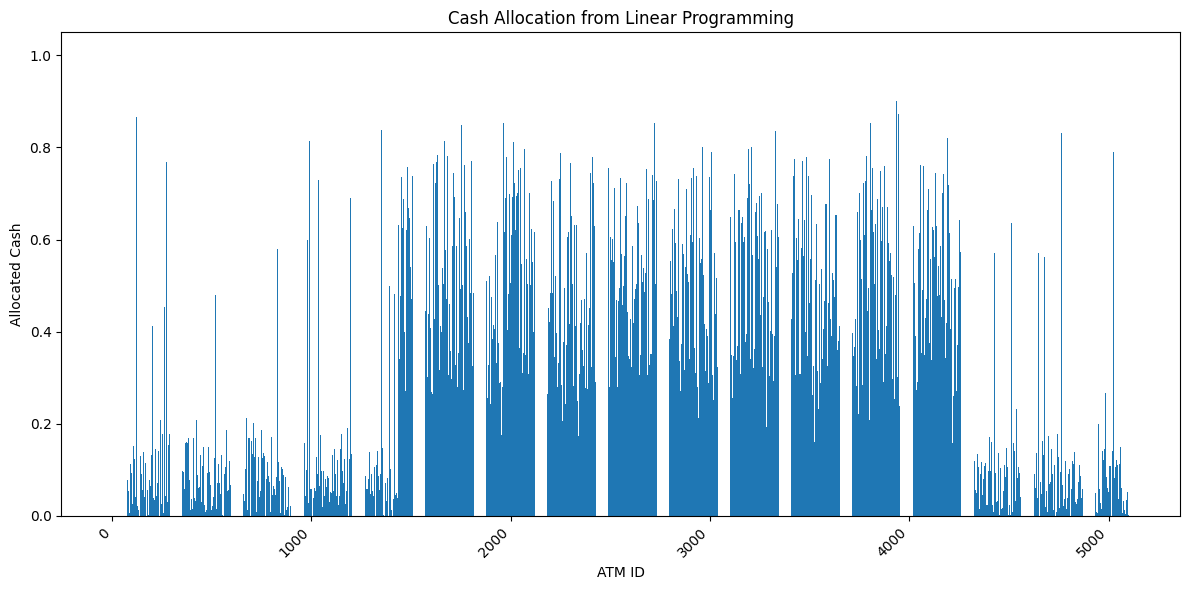

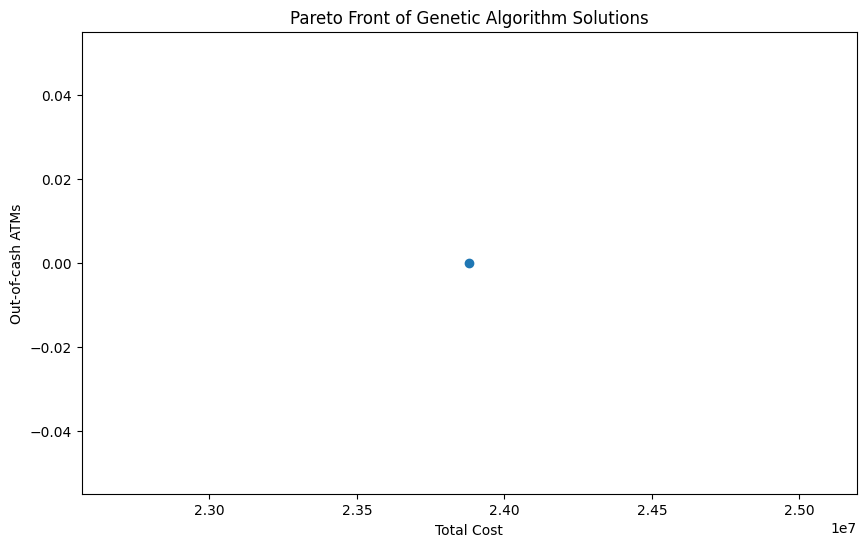

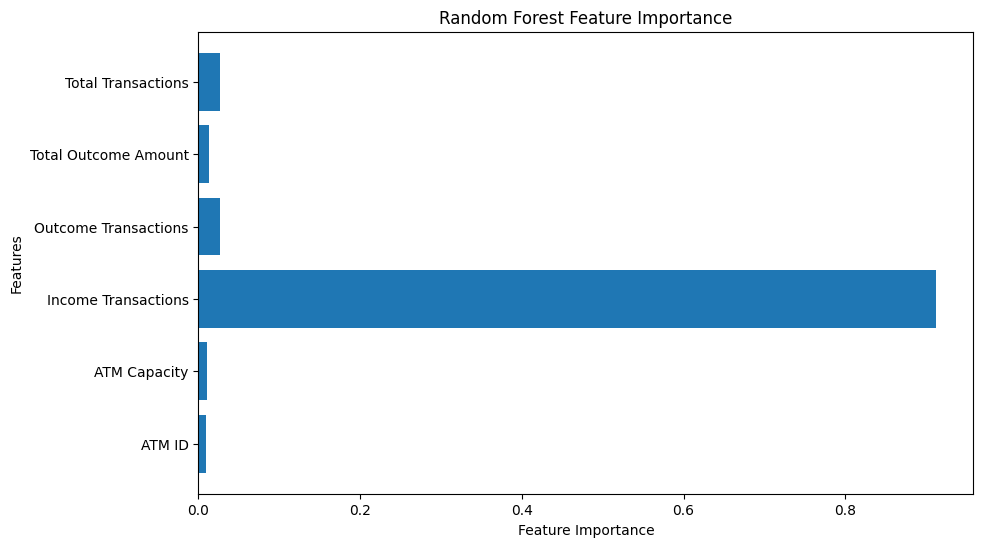

In [ ]:
import matplotlib.pyplot as plt
# --- Data Visualization ---

# 1. Demand Distribution:
#    - Histogram of 'Total Income Amount' to visualize demand distribution across ATMs.
plt.figure(figsize=(10, 6))
plt.hist(df['Total Income Amount'], bins=20)
plt.xlabel('Total Income Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Demand Across ATMs')
plt.show()

# 2. Clustering Results:
#    - Scatter plot of clusters (if you have performed clustering).
#    - Use different colors or markers for each cluster.
if 'Cluster' in df.columns:
  plt.figure(figsize=(10, 6))
  plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis')
  plt.xlabel('Longitude')
  plt.ylabel('Latitude')
  plt.title('ATM Clusters')
  plt.colorbar(label='Cluster')
  plt.show()

# 3. Regression Model Performance:
#    - Scatter plot of actual vs. predicted demand for both Random Forest and Gradient Boosting.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, label='Random Forest', alpha=0.7)
plt.scatter(y_test, gb_predictions, label='Gradient Boosting', alpha=0.7)
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Regression Model Performance')
plt.legend()
plt.show()

# 4. Linear Programming Results:
#    - Bar chart showing cash allocation for each ATM.
plt.figure(figsize=(12, 6))
plt.bar(df['ATM ID'].unique(), [pulp.value(cash_variables[atm]) for atm in df['ATM ID'].unique()])
plt.xlabel('ATM ID')
plt.ylabel('Allocated Cash')
plt.title('Cash Allocation from Linear Programming')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Genetic Algorithm Results:
#    - Scatter plot of Pareto front solutions (cost vs. out-of-cash ATMs).
plt.figure(figsize=(10, 6))
for individual in best_individuals:
  fitness = individual.fitness.values
  plt.scatter(fitness[0], fitness[1])
plt.xlabel('Total Cost')
plt.ylabel('Out-of-cash ATMs')
plt.title('Pareto Front of Genetic Algorithm Solutions')
plt.show()

# 6. Feature Importance:
#    - Bar chart showing feature importance from Random Forest or Gradient Boosting.
if 'rf_model' in locals():
  feature_importances = rf_model.feature_importances_
  plt.figure(figsize=(10, 6))
  plt.barh(X_train.columns, feature_importances)
  plt.xlabel('Feature Importance')
  plt.ylabel('Features')
  plt.title('Random Forest Feature Importance')
  plt.show()




In [ ]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 42.2 MB/s eta 0:00:00
